# Demonstrate Linear Ballistic Accumulator model

The LBA model can be used to simulate responses with any number of options. Given a few parameters, the LBA model will define the probability of observing different outcomes.

## Define LBA probability density function

The PDF for LBA defines the probability density for each possible response time. It varies depending on the parameters of the model.

In [1]:
import os
import sys
import math
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

module_path = os.path.abspath('..')
if module_path not in sys.path:
    sys.path.append(module_path)
from psireact import lba

In [2]:
# define a model object for LBA
model_lba = lba.LBA()

# get the probability density function
f = model_lba.function_pdf()

In [3]:
# set times and responses to evaluate
n = 100  # number of times
m = 24  # number of choices
k = 3  # number of parameter values to test
t = np.tile(np.linspace(0, 4, n), m)
r = np.repeat(range(m), n).astype('int32')
demo = np.repeat(range(3), n * m)
df = pd.DataFrame({'rt': np.tile(t, k), 'response': np.tile(r, k),
                   'demo': demo, 'pdf': np.zeros(n * m * k)})

## Vary drift rate

Each choice $i$ is associated with a mean drift rate $v_i$. The rate of different accumulators determines both response probabilities and response times. We can visualize both by plotting "defective" response time distributions that are scaled by the probability of a given response. The blue line is response 1, and the orange line is response 2.

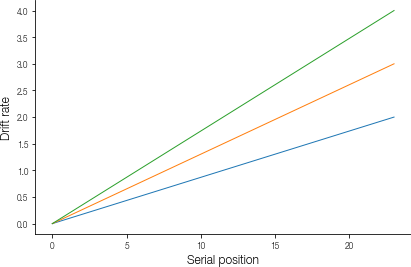

In [4]:
v_mat = np.vstack((np.linspace(0, 2, 24),
                   np.linspace(0, 3, 24),
                   np.linspace(0, 4, 24)))
fig, ax = plt.subplots()
h = ax.plot(v_mat.T)
h = ax.set_xlabel('Serial position')
h = ax.set_ylabel('Drift rate')

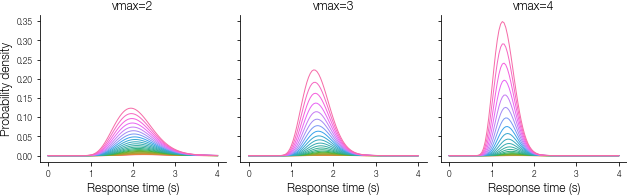

In [7]:
A = 5
b = 10
s = 1
tau = 0
v_max = [2, 3, 4]
for i, v in enumerate(v_mat):
    df.loc[demo == i, 'pdf'] = f(t, r, A, b, v, s, tau)
    df.loc[demo == i, 'demo'] = f'vmax={v_max[i]}'

g = sns.FacetGrid(df, col='demo', hue='response')
g = (g.map_dataframe(sns.lineplot, x='rt', y='pdf')
      .set_titles('{col_name}')
      .set_xlabels('Response time (s)')
      .set_ylabels('Probability density'))
g.savefig('lba_24afc.png')

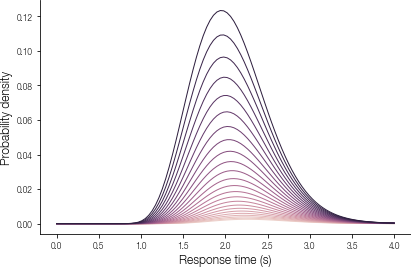

In [20]:
dfs = df.loc[df.demo == 'vmax=2']
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(x='rt', y='pdf', hue='response', 
                  legend=False, data=dfs, ax=ax)
h = ax.set_xlabel('Response time (s)')
h = ax.set_ylabel('Probability density')
fig.savefig('lba_24afc.png', dpi=300)

The joint distribution over all responses is a probability distribution, so the integral over all responses and all response times should be close to 1. Check this using numerical integration (note that the integral depends on the range of times we examine, so it may be slightly less than 1):

In [6]:
index = df.demo.unique()
idf = pd.DataFrame({'integral': np.zeros(len(index))}, index=index)
for name, group in df.groupby('demo'):
    idf.loc[name] = integrate.trapz(group.pdf, group.rt)
idf

,integral
vmax=2,0.993273
vmax=3,0.999997
vmax=4,1.000000
